In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline


In [4]:
import yfinance as yf
import pandas as pd

# Scarico i dati BTC/USD dal 2020 al 2025
df = yf.download("BTC-USD", start="2020-01-01", end="2025-01-01")

# Salvo il dataset in CSV
df.to_csv("BTCUSD_2020_2025.csv", index=False)

print("✅ Dataset scaricato e salvato come BTCUSD_2020_2025.csv")

# Salvataggio del dataset in CSV
df.to_csv("BTCUSD_2020_2025.csv", index=False)

print("Dataset salvato come BTCUSD_2020_2025.csv")


/tmp/ipykernel_144/2656089066.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("BTC-USD", start="2020-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed

✅ Dataset scaricato e salvato come BTCUSD_2020_2025.csv
Dataset salvato come BTCUSD_2020_2025.csv


In [5]:
btc = yf.download("BTC-USD", start="2020-01-01", end="2025-01-01")
btc = btc.dropna()
btc.head()


/tmp/ipykernel_144/984235388.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  btc = yf.download("BTC-USD", start="2020-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2020-01-01,7200.174316,7254.330566,7174.944336,7194.892090,18565664997
2020-01-02,6985.470215,7212.155273,6935.270020,7202.551270,20802083465
2020-01-03,7344.884277,7413.715332,6914.996094,6984.428711,28111481032
2020-01-04,7410.656738,7427.385742,7309.514160,7345.375488,18444271275
2020-01-05,7411.317383,7544.497070,7400.535645,7410.451660,19725074095


In [10]:
#salvataggio dataset a csv
btc.to_csv("BTCUSD_2020_2025.csv")

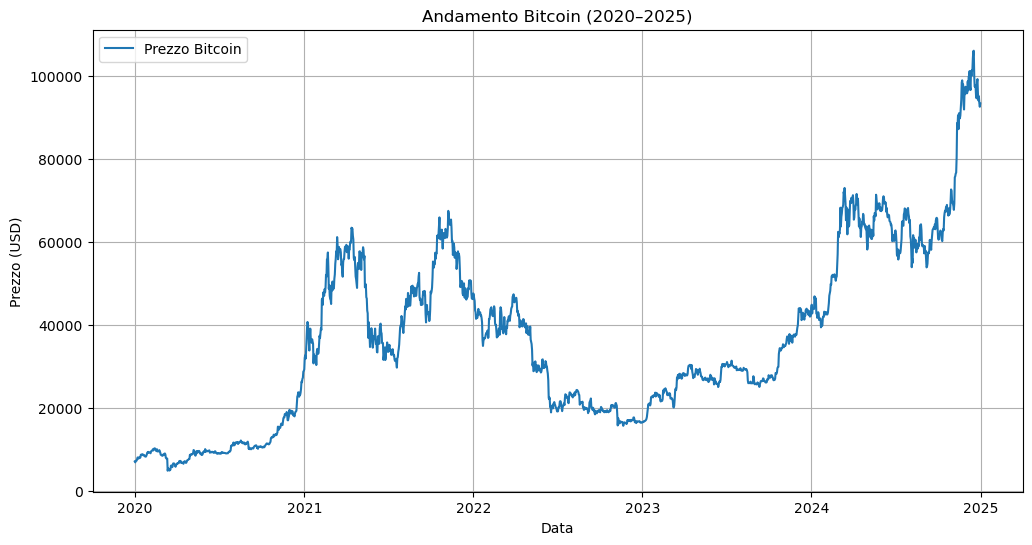

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(btc.index, btc['Close'], label="Prezzo Bitcoin")
plt.xlabel("Data")
plt.ylabel("Prezzo (USD)")
plt.title("Andamento Bitcoin (2020–2025)")
plt.legend()
plt.grid(True)
plt.show()


In [9]:
btc["Target"] = btc["Close"].shift(-1)
btc = btc.dropna()

X = btc[["Open", "High", "Low", "Close", "Volume"]]
y = btc["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


MSE: 3533096.954798931
R²: 0.9835666915072223


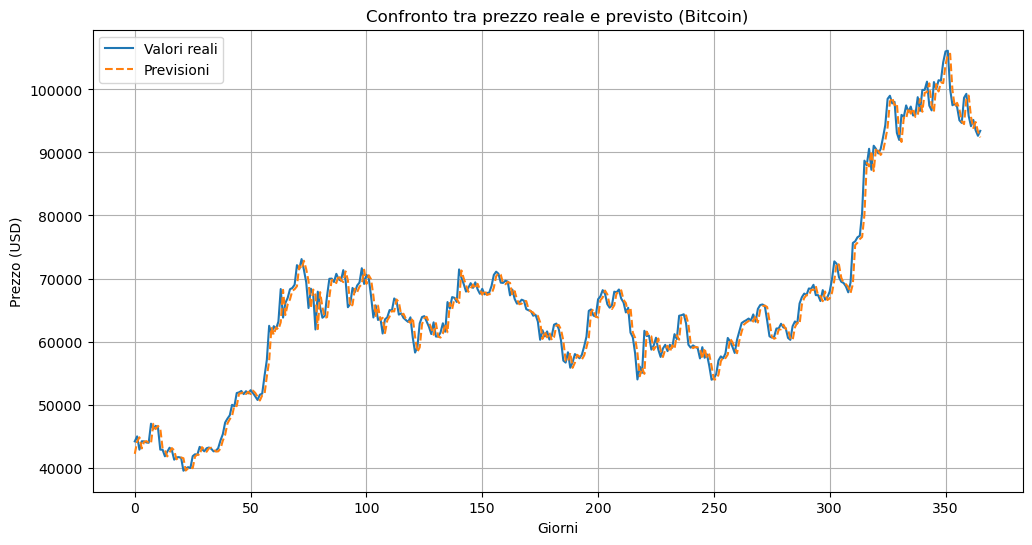

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Valori reali")
plt.plot(y_pred, label="Previsioni", linestyle="--")
plt.title("Confronto tra prezzo reale e previsto (Bitcoin)")
plt.xlabel("Giorni")
plt.ylabel("Prezzo (USD)")
plt.legend()
plt.grid(True)
plt.show()
